In [16]:
import yfinance as yf
import pandas_ta as ta
import numpy as np
import pandas as pd

In [17]:
data = yf.download(
    tickers = """BTC-USD ETH-USD LTC-USD BNB-USD XRP-USD DOGE-USD
                 ADA-USD XLM-USD LINK-USD XMR-USD ETC-USD FIL-USD""",
    period = "max")

[*********************100%***********************]  12 of 12 completed


In [54]:
data_open = data["Open"].copy()
data_open

,ADA-USD,BNB-USD,BTC-USD,DOGE-USD,ETC-USD,ETH-USD,FIL-USD,LINK-USD,LTC-USD,XLM-USD,XMR-USD,XRP-USD
Date,,,,,,,,,,,,
2014-09-17,NaN,NaN,465.864014,NaN,NaN,NaN,NaN,NaN,5.085890,NaN,NaN,NaN
2014-09-18,NaN,NaN,456.859985,NaN,NaN,NaN,NaN,NaN,5.065430,NaN,NaN,NaN
2014-09-19,NaN,NaN,424.102997,NaN,NaN,NaN,NaN,NaN,4.687290,NaN,NaN,NaN
2014-09-20,NaN,NaN,394.673004,NaN,NaN,NaN,NaN,NaN,4.329200,NaN,NaN,NaN
2014-09-21,NaN,NaN,408.084991,NaN,NaN,NaN,NaN,NaN,4.263070,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-24,0.318333,297.945862,16611.636719,0.081792,20.353790,1183.345093,4.439727,6.702620,78.999107,0.088587,134.904160,0.381579
2022-11-25,0.316420,300.333832,16602.269531,0.081469,20.208546,1203.799438,4.391639,6.830993,78.807121,0.089981,136.720001,0.401982
2022-11-26,0.314953,300.571747,16521.576172,0.089465,20.087831,1198.790527,4.291033,6.841487,74.021461,0.089310,136.314728,0.408410


In [57]:
ind_close = data["Close"].apply(lambda x: ta.rsi(x), axis = 0)
ind_close

,ADA-USD,BNB-USD,BTC-USD,DOGE-USD,ETC-USD,ETH-USD,FIL-USD,LINK-USD,LTC-USD,XLM-USD,XMR-USD,XRP-USD
Date,,,,,,,,,,,,
2014-09-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-24,39.112164,55.093960,40.295294,46.041456,45.420673,43.341470,42.725370,50.984305,71.645724,42.150400,50.302816,49.662366
2022-11-25,38.706607,55.145201,39.672291,52.645325,44.916067,42.968750,40.602586,51.109548,63.429520,41.415172,49.806567,51.154621
2022-11-26,38.357005,58.797377,39.217384,52.225977,44.001147,43.687724,41.081812,54.661329,65.509087,40.140987,52.652755,48.323163


In [63]:
ind_close = ind_close.fillna(-np.inf)

In [68]:

num_holdings = 2

trades = []

asset_names = data_open.columns

for i in range(len(data) - 2):
    
    ind_close_row = ind_close.iloc[i]
    tomorrow_open_row = data_open.iloc[i+1]
    tomorrow_open_2_row = data_open.iloc[i+2]
    
    num_assets_ind = np.count_nonzero(~np.isinf(ind_close_row))
    
    if num_assets_ind >= 2*num_holdings:
        top_x = np.argpartition(ind_close_row.to_numpy(), -num_holdings)[-num_holdings:]
        
        for asset in top_x:
            trades.append([
                asset_names[asset],
                tomorrow_open_row.name,
                tomorrow_open_row.iloc[asset],
                tomorrow_open_2_row.name,
                tomorrow_open_2_row.iloc[asset],
                (tomorrow_open_2_row.iloc[asset]/tomorrow_open_row.iloc[asset]) -1,
            ])

    

trades = pd.DataFrame(trades,
                     columns = ["name","buy_time","buy_price","sell_time","sell_price","return"])
print(trades)

          name   buy_time   buy_price  sell_time  sell_price    return
0     DOGE-USD 2017-11-24    0.001940 2017-11-25    0.001923 -0.008763
1      ETH-USD 2017-11-24  412.501007 2017-11-25  475.675995  0.153151
2     DOGE-USD 2017-11-25    0.001923 2017-11-26    0.002073  0.078003
3      ETH-USD 2017-11-25  475.675995 2017-11-26  465.973999 -0.020396
4     DOGE-USD 2017-11-26    0.002073 2017-11-27    0.001999 -0.035697
...        ...        ...         ...        ...         ...       ...
3655   LTC-USD 2022-11-25   78.807121 2022-11-26   74.021461 -0.060726
3656   BNB-USD 2022-11-26  300.571747 2022-11-27  311.372040  0.035932
3657   LTC-USD 2022-11-26   74.021461 2022-11-27   76.383530  0.031911
3658   BNB-USD 2022-11-27  311.372040 2022-11-29  293.247467 -0.058209
3659   LTC-USD 2022-11-27   76.383530 2022-11-29   73.914597 -0.032323

[3660 rows x 6 columns]


In [73]:
doge_trades = trades[ trades["name"] == "DOGE-USD"]
doge_trades

,name,buy_time,buy_price,sell_time,sell_price,return
0,DOGE-USD,2017-11-24,0.001940,2017-11-25,0.001923,-0.008763
2,DOGE-USD,2017-11-25,0.001923,2017-11-26,0.002073,0.078003
4,DOGE-USD,2017-11-26,0.002073,2017-11-27,0.001999,-0.035697
6,DOGE-USD,2017-11-27,0.001999,2017-11-28,0.001991,-0.004002
30,DOGE-USD,2017-12-09,0.002772,2017-12-10,0.002607,-0.059524
...,...,...,...,...,...,...
3638,DOGE-USD,2022-11-17,0.085594,2022-11-18,0.084764,-0.009697
3640,DOGE-USD,2022-11-18,0.084764,2022-11-19,0.084672,-0.001085
3642,DOGE-USD,2022-11-19,0.084672,2022-11-20,0.084582,-0.001063
3644,DOGE-USD,2022-11-20,0.084582,2022-11-21,0.077175,-0.087572


In [76]:
new_trades = [] 

current_trade = {"name":"DOGE-USD"}

for i in range(len(doge_trades) -1 ):
    
    current_row = doge_trades.iloc[i]
    next_row = doge_trades.iloc[i+1]
    
    if len(current_trade) == 1:
        current_trade["buy_price"] = current_row["buy_price"]
        current_trade["buy_time"] = current_row["buy_time"]
        
    elif current_row["sell_time"] != next_row["buy_time"]:
        current_trade["sell_price"] = current_row["sell_price"]
        current_trade["sell_time"] = current_row["sell_time"]
        new_trades.append(current_trade)
        current_trade = {"name":"DOGE-USD"}
        
pd.DataFrame(new_trades)
        
    

,name,buy_price,buy_time,sell_price,sell_time
0,DOGE-USD,0.001940,2017-11-24,0.001991,2017-11-28
1,DOGE-USD,0.002772,2017-12-09,0.003449,2017-12-14
2,DOGE-USD,0.003670,2017-12-15,0.005619,2017-12-20
3,DOGE-USD,0.007386,2017-12-22,0.008856,2017-12-28
4,DOGE-USD,0.017115,2018-01-08,0.003782,2018-04-13
5,DOGE-USD,0.003958,2018-04-14,0.005489,2018-04-24
6,DOGE-USD,0.005128,2018-04-26,0.005364,2018-04-28
7,DOGE-USD,0.002812,2018-07-17,0.003339,2018-07-22
8,DOGE-USD,0.003216,2018-08-31,0.005605,2018-09-20
9,DOGE-USD,0.005813,2018-10-03,0.002194,2018-12-05


In [69]:
daily_returns = trades[["buy_time","return"]].groupby("buy_time").mean()
daily_returns

,return
buy_time,
2017-11-24,0.072194
2017-11-25,0.028803
2017-11-26,-0.011886
2017-11-27,0.007529
2017-11-28,0.660177
...,...
2022-11-23,0.064149
2022-11-24,0.002792
2022-11-25,-0.029967


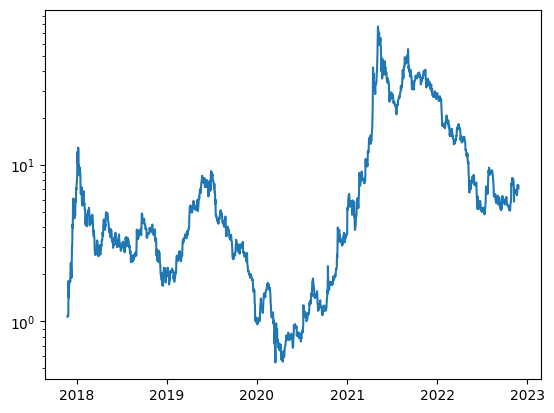

In [72]:
import matplotlib.pyplot as plt

cum_returns = ((daily_returns - 0.001) + 1).cumprod()

plt.semilogy(cum_returns.index, cum_returns)